In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [16]:
image_resolution = 384

In [125]:
# load the dataset
image_path = "Car1Rotations/car1_{}_{}.png".format(image_resolution, 0)
digits = datasets.load_digits()
data = []
data2 = []
for i in range(360):
    image_path1 = "Car1Rotations/car1_{}_{}.png".format(image_resolution, i)
    image_path2 = "Car2Rotations/car2_{}_{}.png".format(image_resolution, i)
    img1 = plt.imread(image_path1)
    img2 = plt.imread(image_path2)
    rgb_weights = [0.2989, 0.5870, 0.1140]
    grayscale_img1 = np.dot(img1, rgb_weights)
    grayscale_img2 = np.dot(img2, rgb_weights)
    img_flat1 = grayscale_img1.flatten()
    img_flat2 = grayscale_img2.flatten()
    data.append(img_flat1)
    data2.append(img_flat2)

In [127]:
data = np.array(data)
data2 = np.array(data2)
target = []
for i in range(360):
    target.append(int(i/10))
target = np.array(target)
print('Shape of dataset1: {}\nand shape of dataset2:{}\n and target: {}'.format(data.shape, data2.shape, target.shape))

Shape of dataset1: (360, 147456)
and shape of dataset2:(360, 147456)
 and target: (360,)


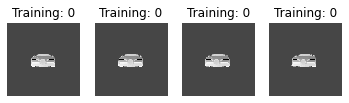

In [128]:
#plot the data, which is just the images flattened into a 1-d array
for i in range(0, 4):
    plt.subplot(2, 4, i + 1)
    plt.axis('off')
    imside = int(np.sqrt(data[i,].shape[0]))
    im1 = np.reshape(data[i,], (imside, imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Training: {}'.format(target[i]))
plt.show()

In [119]:
#X_train, X_test, y_train, y_test = train_test_split(data,target,random_state=0)
#print('Training data and target sizes: \n{}, {}'.format(X_train.shape, y_train.shape))
#print('Test data and target sizes: \n{}, {}'.format(X_test.shape, y_test.shape))

Training data and target sizes: 
(540, 147456), (540,)
Test data and target sizes: 
(180, 147456), (180,)


In [137]:
# Create a classifier: a support vector classifier
classifier = SVC(gamma = 0.001)
#fit to the training data
classifier.fit(data, target)

SVC(gamma=0.001)

In [138]:
# now to predict the value of the rotation on the test data
y_pred = classifier.predict(data2)

In [139]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(target, y_pred)))

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.07      0.90      0.12        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10
          16       0.00   

/Users/sarahmclaughlin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
conf_mat = confusion_matrix(target, y_pred)
print("Confusion matrix:\n%s" % conf_mat)
np.set_printoptions(threshold=np.inf)
print(conf_mat.shape)

Confusion matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  1]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  9]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0